In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon-LOO.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**MY LINK**
https://github.com/zachyyy700/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Average Salmon Catch per Alaskan Region (1878-1997)'}, xlabel='Count (Thousands of Fish)', ylabel='Region'>

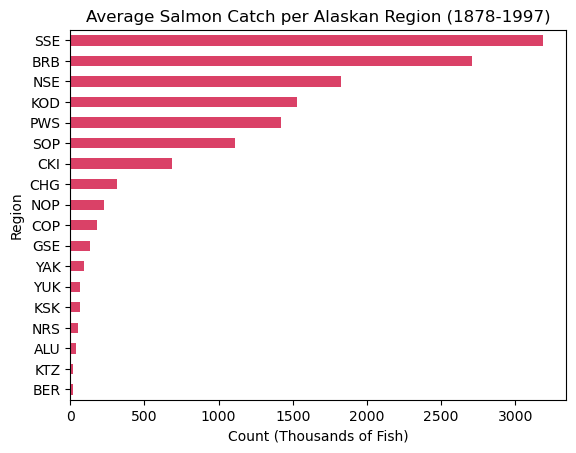

In [2]:
# FINAL CODE

# Import pandas
import pandas as pd

# Load data
catch_data = pd.read_csv('data/salmon_data.csv')

# Change invalid value in Catch column & update column to type int64
# Justify knowing row index?
catch_data.loc[400, ['Catch']] = 1 

# Change Catch column to type int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Create dataframe for average fish catch by region
avg_region = catch_data.groupby('Region')['Catch'].mean().round(2).sort_values(ascending=True) # Sort values for descending bar plot

# Plot barplot
avg_region.plot(kind='barh', color='#da4167', 
                title="Average Salmon Catch per Alaskan Region (1878-1997)",
                xlabel="Count (Thousands of Fish)",
                y = "Region")

## 1

a. Use this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [4]:
# a.

# Load packages
import pandas as pd

# Load data
catch_data = pd.read_csv('data/salmon_data.csv')

# View first five rows
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [5]:
# b.

# Display dataframe shape
print(f'Data Shape: {catch_data.shape}\n')

# Display dataframe info for missing values
print("Data Info:")
print(catch_data.info())

# Display unique values in species column
print(f'\nUnique Species: {catch_data.Species.unique()}')

Data Shape: (8540, 5)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB
None

Unique Species: ['Chinook' 'Sockeye' 'Coho' 'Pink' 'Chum']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in b. and what information you obtained from doing it.

1. I used `.shape` mainly to find how many rows are in the dataframe, there are a total of 8540 rows.

2. I used `.info()` to get missing value counts, four columns have zero missing values and one (notesRegCode) is about 80% missing but it's okay since these are additional, optional comments.

3. I was also curious about the different types of species of salmon so I used `.unique()` on the Species column.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [6]:
# Display unique valaues in notes column
notes_unique = catch_data.notesRegCode.unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [7]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [8]:
# Drop notes column
catch_data = catch_data.drop('notesRegCode', axis = 1)

if 'notesRegCode' in catch_data.columns:
    print('Notes column not removed')
else:
    print('Notes column removed')

Notes column removed


In [9]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


- Since the Catch column represents a number, this column should be an integer type.
- We may also want the Year column to be in datetime format, not an integer.

In [10]:
# Check column datatypes
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [11]:
# Attempt to change Catch column to int64
# catch_data['Catch'].astype('int64')

- ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [12]:
# Filter to row where Catch column contains 'I'
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [13]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this single row in the `catch_1` variable. 

In [14]:
# Update value in the selected row
catch_1 = catch_I.loc[400, ['Catch']] = 1

# Print catch_1
catch_1

1

## 6.5

Modify the row in `catch_data` to be able to convert the `Catch` column in the next step

In [15]:
type(catch_data)

pandas.core.frame.DataFrame

In [16]:
# Update value within original dataframe
catch_data.loc[400, ['Catch']] = 1

# Confirm new value in selected row
catch_data.loc[400]

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [17]:
# Confirm the updated datatype of Catch column
catch_column_type = catch_data['Catch'].astype('int64').dtype
catch_column_type

dtype('int64')

3. Update the `Catch` column in `catch_data`

In [18]:
# Update the Catch column datatype
catch_data['Catch'] = catch_data['Catch'].astype('int64')

In [19]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [20]:
# Groupby region and calculate mean
avg_region = catch_data.groupby('Region')['Catch'].mean().round(2).sort_values(ascending=True)
avg_region

Region
BER      16.37
KTZ      18.84
ALU      40.38
NRS      51.50
KSK      67.64
YUK      68.65
YAK      91.92
GSE     133.84
COP     179.22
NOP     229.49
CHG     315.49
CKI     683.57
SOP    1110.94
PWS    1419.24
KOD    1528.35
NSE    1825.02
BRB    2709.80
SSE    3184.66
Name: Catch, dtype: float64

In [21]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Average Salmon Catch per Alaskan Region (1878-1997)'}, xlabel='Count (Thousands of Fish)', ylabel='Region'>

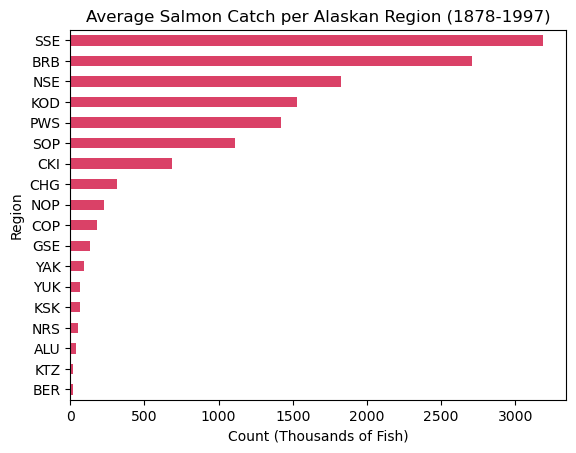

In [22]:
# Create horizontal barplot
avg_region.plot(kind='barh', color='#da4167', 
                title="Average Salmon Catch per Alaskan Region (1878-1997)",
                xlabel="Count (Thousands of Fish)",
                y = "Region")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer should use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

- From 1878-1997, the Southern Southeast region of Alaska (SSE) had the highest average commercial catch of salmon throughout the state, with over 3 million fish caught. The region with the second largest commercial catch numbers were the Bristol Bay Management Area (BRB) and in third, Northern Southeast Alaska (NSE). The three regions with the lowest salmon caught are: Bering River Subarea Copper River Subarea (BER), Kotzebue Management Area (KTZ), and Aleutian Islands Subarea (ALU).

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* output of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [23]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!